In [1]:
import numpy as np
import numba as nb  #uncomment for numba
import matplotlib.pyplot as plt
import sombrero as sm
%matplotlib inline

# Classwork 13

Christine Outlaw, Baylee Mumma

November 28, 2017

CPU times: user 192 ms, sys: 48 ms, total: 240 ms
Wall time: 430 ms


CPU times: user 472 ms, sys: 8 ms, total: 480 ms
Wall time: 544 ms


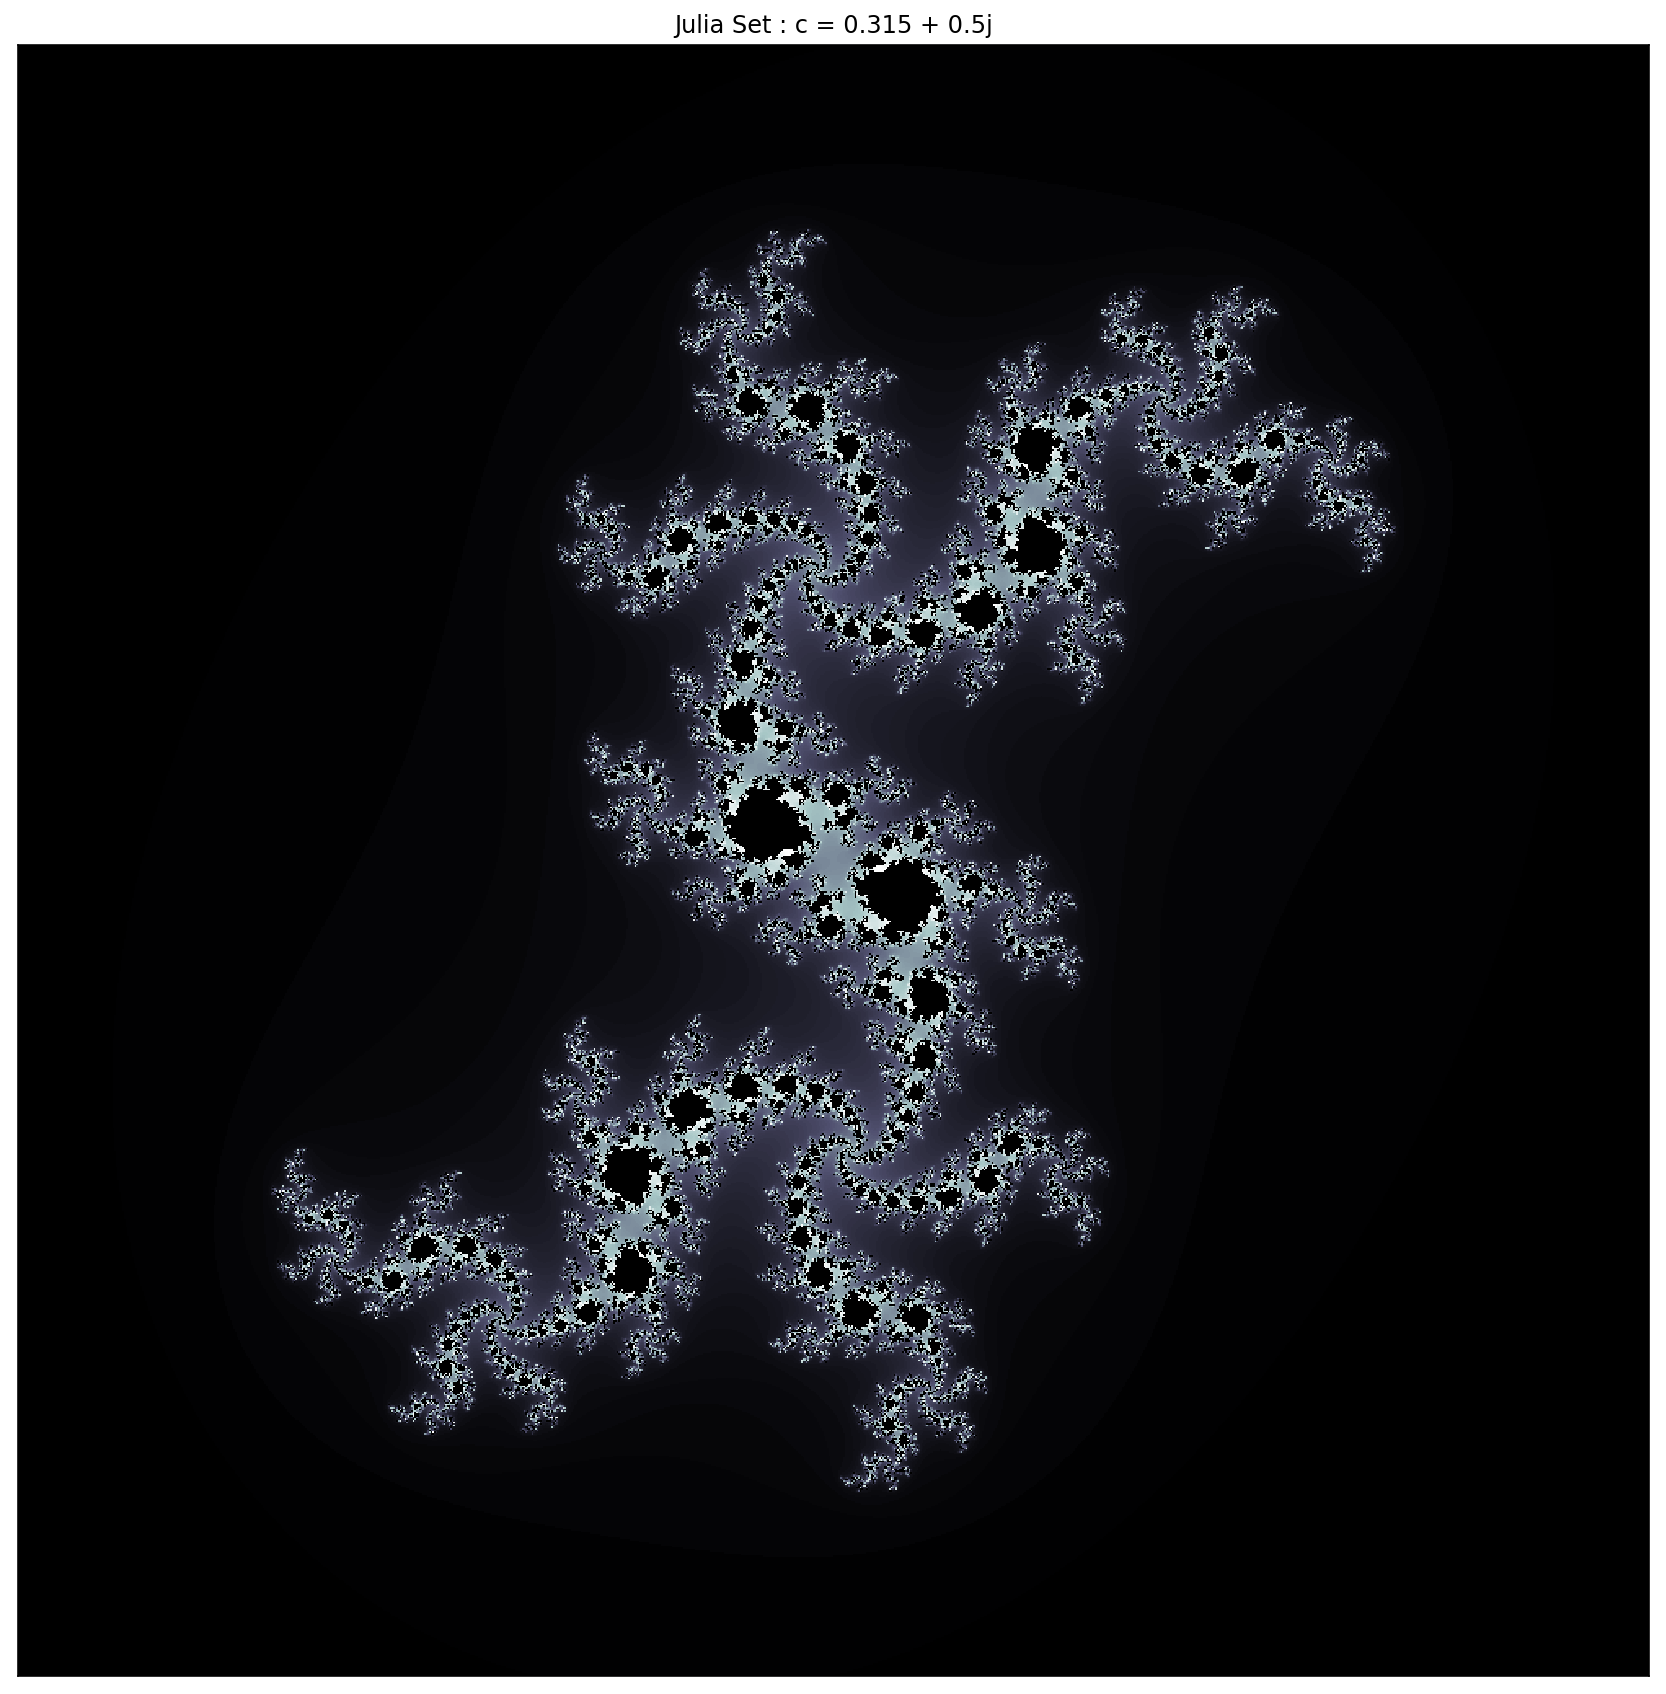

In [2]:
def julia(c):
    #@np.vectorize  #comment for numba
    @nb.vectorize #uncomment for numba
    def j(z):
        for n in range(100):
            z = z**2 + c
            if abs(z) > 2:
                return n
        return 0
    return j

j = julia(0.315 + 0.5j)

@nb.jit  #uncomment for numba
def cplane(min=-1.5, max=1.5, points=1000):
    r = np.linspace(-1.5, 1.5, 1000)
    x, y = np.meshgrid(r,r)
    z = x + y * 1j
    return z

%time z = cplane()
%time jset = j(z)

plt.figure(1, (20,15))
plt.imshow(jset, cmap=plt.cm.bone)
plt.xticks([])
plt.yticks([])
plt.title("Julia Set : c = 0.315 + 0.5j")
plt.show()

In [3]:
t,x,y = sm.rk4(0,10,0,0,.25,.18)

In [4]:
%time t,x,y

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


(array([  0.00000000e+00,   1.00001358e-03,   2.00002715e-03, ...,
          6.28298530e+01,   6.28308531e+01,   6.28318531e+01]),
 array([  0.00000000e+00,   0.00000000e+00,   1.80067491e-07, ...,
          1.17527593e+00,   1.17534449e+00,   1.17541276e+00]),
 array([ 0.        ,  0.00017998,  0.00035991, ...,  0.06852504,
         0.06823985,  0.0679545 ]))

**With numba**

CPU times: user 0 ns, sys: 0 ns, total: 0 ns

Wall time: 8.82 µs


**Without**

CPU times: user 0 ns, sys: 0 ns, total: 0 ns

Wall time: 9.06 µs